
In this notebook, we will read the contents of the spreadsheet file of the dataset, display some plots to visualise data, perform data normalisation, run classification tasks and classifiers. We are using the Dry Bean Dataset supplied on the UCI Machine Learning webpage.

As per the **Dry Bean Dataset's** details on the UCI Machine Learning webpage, the images of **13,611 grains** of **seven** different registered varieties of dry beans were taken and **distinguished based on similar features (16 features)** in order to obtain uniform seed classification. These **16 features** include **12 dimension** and **4 shape** forms of the grains. It is also mentioned that are **no missing values** in this dataset.

All the tasks to be performed are divided into the following sections.
* **PART 1: Data Loading and visualization**
            1.1 Reading the data, seeing the first few lines and displaying the features
            1.2 Displaying the number of instances of each class
            1.3 Plotting histograms for all the features
            1.4 Finding 6 interesting features
            1.5 Plotting a scatter matrix for these features
            
* **PART 2: Data Preparation and feature selection**
            2.1 Randomly splitting(80/20 split) the dataset to training and test sets using train_test_split function
            2.2 Finding the number of instances in the training and test sets
            2.3 Feature scaling on training set using StandardScaler or MinMaxScaler class
* **PART 3: Support Vector Classifier**
            3.1 Performing one versus one binary classification using Support Vector Classifier on training set
            3.2 Displaying the confusion matrix on the test set using plot_confusion_matrix function
* **PART 4: Stochastic Gradient Descent Classifier**
* **PART 5: Comparision of the results**

Let us peform the tasks.
#### PART 1: Data loading and visualization
###### 1.1 &emsp; The below code is to read the data, see the first few lines and then display the features of the dataset

In [1]:
import os
import pandas as pd
import numpy as np

cwd = os.getcwd()   #get the current working directory
newpath = os.path.join(cwd,'DryBeanDataset','Dry_Bean_Dataset.xlsx')  #retrieving the path of the dataset spreadsheet file
df = pd.read_excel(newpath)    #reading the spreadsheet file to the dataframe df
df.head()     #displaying the first 5 records of the Dry Bean Dataset 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [2]:
df.info()     #displaying all attributes and their datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [3]:
df.describe()  #displaying the summary of the numeric attributes 

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


###### 1.2 &emsp; The below code is to display the number of instances of each class
value_counts() can be used to find out what categories of the beans exists and how many of them belong to each category. Let us also have a look at the summary of each numerical feature

In [4]:
print("The number of instances of each class are as below \n",df['Class'].value_counts())  #counting the unique values in the 'Class' attribute

The number of instances of each class are as below 
 DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


The dry bean seeds are classified into 7 categories namely Dermason, Sira, Seker, Horoz, Cali, Barbunya and Bombay and the class 'Bombay' has the fewest instances (522).  

We can see that the Dry Beans Dataset consists of 13611 entries with 17 columns.  
From the dataset information, the 12 dimension attributes are Area, Perimeter, MajorAxisLength, MinorAxisLength, AspectRation, Eccentricity, ConvexArea, EquiviDiameter, Extent, Solidity, roundness, Compactness and the 4 shapes attributes are ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4. 
###### 1.3 &emsp;The below code is to plot a histogram for all the features in the dataset

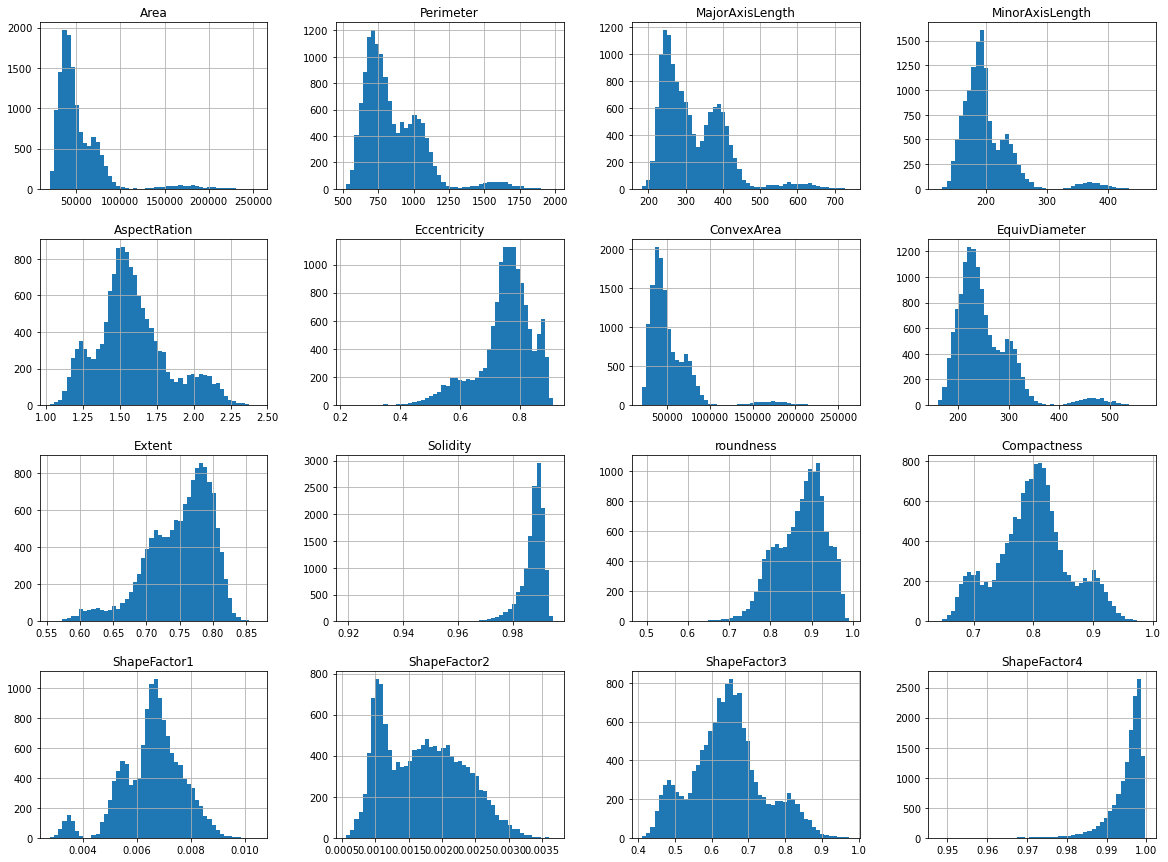

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20,15))   #plotting histograms for all the numeric columns
plt.show()

This initial visualization of the histogram reveals interesting facts regarding our dataset. We can see that the sample size is reasonably uniform. The data distribution of the features Area and ConvexArea is right-skewed, with some assumed outliers. Also, the data distribution of the features Solidity and ShapeFactor4 is left-skewed. The features MinorAxisLength, EquivDiameter, ShapeFactor1 may also has assumed outliers because of a bit farther data points. This might also be due to incorrect data entry or measurement errors. The features Compactness and ShapeFactor3 has the data spread as two groups, all looking similiar. The data distribution of the features ShapeFactor1, ShapeFactor2, ShapeFactor3 and ShapeFactor4 is distinctive to each other.

###### 1.4 &emsp; Finding 6 interesting features 
In machine learning, feature selection can be done using three techniques.
* Univariate selection
* Feature Importance
* Correlation Matrix 

Here, we are using Correlation matrix technique in order to find the 6 best features from the data set. The correlation matrix shows **Positive** output if the feature is highly relevant and will show a **Negative** output if the feature is less relevant to the data. We can see how much data is correlated to each other and target easily using a heatmap. We will now create a heatmap of the correlated features to find out the best 6.

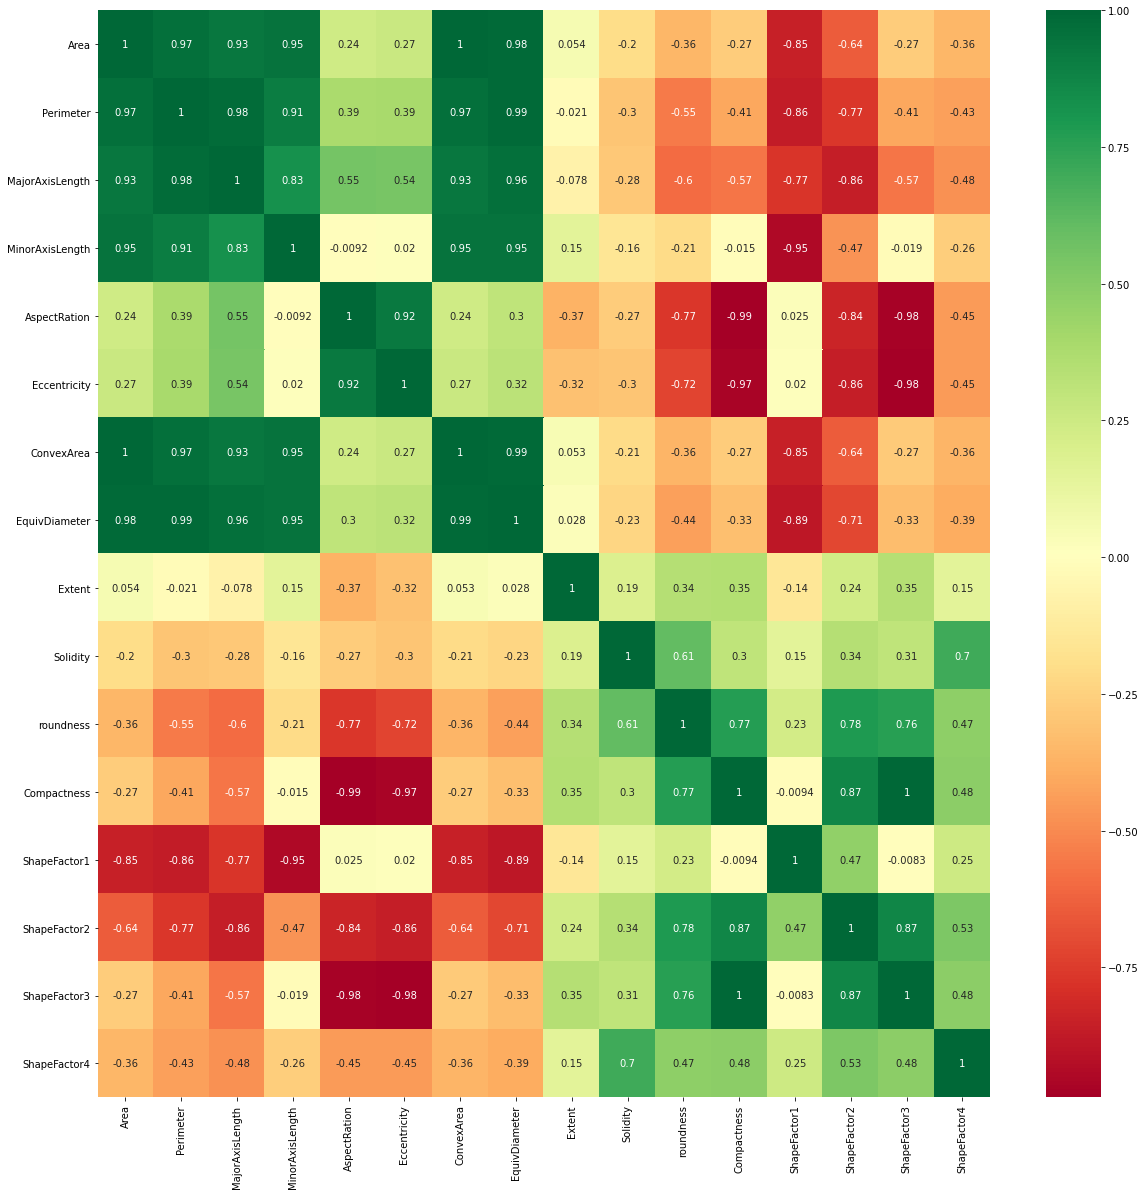

In [6]:
import seaborn as sns

x = df.iloc[:,0:16]    #input columns of the dataset
y = df.iloc[:,-1]    #output column of the dataset (here it is 'Class')

cormatrix = df.corr()    #retrieving the correlations of all the features in the dataset
best_corr_features = cormatrix.index
plt.figure(figsize=(20,20))

hmap = sns.heatmap(df[best_corr_features].corr(), annot = True, cmap = "RdYlGn")    #plotting the heatmap

From the heatmap, we can see that the features **Area**, **Perimeter**, **MajorAxisLength**, **MinorAxisLength**, **ConvexArea** and **EquivDiameter** are highly correlated with each other. So, these can be considered as the 6 best features of the dataset. 

###### 1.5 &emsp; Plotting a Scatter Matrix for the 6 interesting features.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE70B77070>,
      dtype=object)

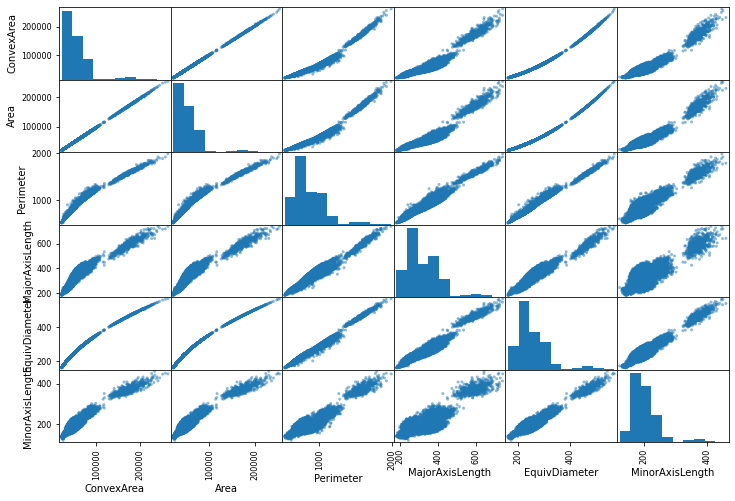

In [7]:
from pandas.plotting import scatter_matrix

attributes = ["ConvexArea","Area","Perimeter","MajorAxisLength","EquivDiameter","MinorAxisLength"] # features list
scatter_matrix(df[attributes],figsize=(12,8))  #plotting a scatter matrix for selected features

From the above scatter matrix, we can observe that there is a positive relationship between the X and Y features ad the scatter matrix's data is showing an uphill pattern as we move from left to right. The features Area, ConvexArea, EquivDiameter have a farily perfect linear pattern, with closely fit data. This indicates that there is a strong relationship between these features. We can also see that most of the features have two groups which are meaningful. As assumed from the histograms, there are not too many outliers for the features ConvexArea and Area. Overall,from the scatter matrix, we can see that the distribution of data is close, which means that all the features have a strong relationship with each other.   

#### PART 2: Data preparation and feature selection
###### 2.1 & 2.2 &emsp; Splitting the data into training and test sets and also finding the number of instances in the training and test sets
Before splitting the dataset into training and test sets, we need to prepare input and output vectors out of the dataset. Let us treat the 'Class' column as output. This means that this model is going to be trained to predict whether the dry beans belong to the above 7 classes(categories) or not. We also need to remove the 'Class' column from the dataset to get the input vector.  

We now randomly split the data into training and test sets with a 80/20 split. For this, we use train_test_split function from sklearn.model_Selection. We will also find the number of instances in the resulting training and test sets.

In [8]:
#to make this notebook's output identical at every run
np.random.seed(10)

In [9]:
from sklearn.model_selection import train_test_split

y = df.Class      #output vector i.e., Class
x = df.drop('Class', axis = 1)     #input vector i.e., remaining columns other than the output column

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print("The number of instances in the dataset are : ", len(df))
print("The number of instances in the training set are: ", len(x_train))
print("The number of instances in the test set are : ", len(x_test))

The number of instances in the dataset are :  13611
The number of instances in the training set are:  10888
The number of instances in the test set are :  2723


#### 2.3 &emsp; Feature scaling on training set using StandardScaler or MinMaxScaler class
We now perform feature scaling on the training set using the StandardScaler transformer from Scikit-Learn.

According to Scikit-Learn, **Standard Scaler** follows the Standard Normal Distribution, i.e., it assumes a normal distribution for data within each feature. The scaling makes the distribution centered around 0, with a standard deviation of 1 and the mean removed. 

We use **fit_transform()** method on the training data so that we can scale the training data and also learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.  

With **transform()** method we can use the same mean and variance as it is calculated from our training data to transform our test data. In this way, the parameters learned by our model using the training data will help us to transform our test data.

In [10]:
#performing feature scaling using standardscaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### PART 3: Support Vector Classifier
###### 3.1 & 3.2 &emsp; Performing one versus one binary classification using Support Vector Classifier on training set and  displaying the confusion matrix on the test set
We are using Scikit-Learn's GridSearchCV to fine-tune the model with hyperparameters, which will use cross-validation to evaluate all the possible combinations of the given hyperparameter values. 

From Scikit-Learn, the **hyperparameters** used for the support vector classifier are **C, gamma, kernel, cv, verbose, refit**.   
* **'C'** is the Misclassification cost, which is a regularization parameter in the SVM. It trades off correct classification of training examples against maximization of the decision function's margin. 
* **'Kernel'** can be set to either Linear or rbf(Radial Basis Function). 
* **'gamma'** is the inverse of the circle of influence, and defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.  
* **'cv'** is the number of cross-validation folds applied for each of the candidate.  
* **'verbose'** is the text output describing the process.  
* **'refit'** is set to either 'True' or 'False'.

In the below code, we are using **decision_function_shape='ovo'** inorder to perform one-versus-one binary classification on the training set. we are setting the **kernel value to 'rbf'**. For kernel=rbf, the inverse regularization parameter C and other parameter gamma is set to different values. With GridSearchCV, we can give a list of vlaues for the C and gamma parameters and it will tell us which value is the best. 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.885, total=   2.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.882, total=   2.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.878, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.880, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.883, total=   2.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.919, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.923, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.927, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.922, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.925, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.927, total=   0.9s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.926, total=   0.7s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.926, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.934, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.920, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.922, total=   1.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.927, total=   0.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.935, total=   0.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.921, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.922, total=   0.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.925, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.927, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.929, total=   0.4s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.2min finished


The Score is  0.9396583394562822
The best parameters are {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'} with a score of 0.93


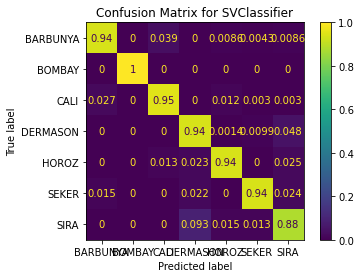

The Classification results of the SVClassifier's confusion matrix are as below
               precision    recall  f1-score   support

    BARBUNYA       0.94      0.94      0.94       233
      BOMBAY       1.00      1.00      1.00       118
        CALI       0.96      0.95      0.96       330
    DERMASON       0.91      0.94      0.92       706
       HOROZ       0.96      0.94      0.95       396
       SEKER       0.96      0.94      0.95       411
        SIRA       0.89      0.88      0.88       529

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

param_grid = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf']}   #creating a dictionary of possible parameters
svm_grid = GridSearchCV(SVC(decision_function_shape = 'ovo'), param_grid, cv=5, refit = True, verbose = 3)   #creating a support vector classifier

svm_grid.fit(x_train, y_train)    #fitting the model for gridsearch
score = svm_grid.score(x_train, y_train)
print("The Score is " , score)
print("The best parameters are %s with a score of %0.2f" %(svm_grid.best_params_, svm_grid.best_score_))   #displaying the best parameter values after tuning

svm_grid_predictions = svm_grid.predict(x_test)    #predictions on the test set

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, svm_grid_predictions)    #confusion matrix for classification results
accuracy_score(y_test, svm_grid_predictions)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_grid, x_test, y_test, normalize='true')    #plotting the confusion matrix
plt.title("Confusion Matrix for SVClassifier")
plt.show()

from sklearn.metrics import classification_report
print("The Classification results of the SVClassifier's confusion matrix are as below\n", classification_report(y_test, svm_grid_predictions))  #printing classification report


Before interpreting the classification report, let us know what the precision, recall, f1-score and support mean.  
**Precision:** percentage of correctly classified instances among that class.  
**Recall:** percentage of the instances of a particular class, you find over the whole number of instances of that particular class.  
**f1-score:** harmonic mean between precision and recall.  
**support:** number of instances of a particular class in the dataset  

From the above classification results, we can see that the Support Vector Classifier has an accuracy of 93%. The overall precision is above 89% with the class BOMBAY having a 100% precision rate and the class SIRA having a 89% (least) precision rate.  
We can also see that more than 88% of the classes can be found over the whole number of elements of these classes (recall rate) with the class SIRA being the least and the class BOMBAY being the highest.  

#### PART 4:  Stochastic Gradient Descent Classifier
######  &emsp; Classification using Stochastic Gradient Descent Classifier on training set and  displaying the confusion matrix on the test set
The **hyperparameters** used for SGDClassifier are **alpha, max_iter, tol, loss, penalty and random_state**. When implementing the fine tuning using GridSearchCV, we **used default values for all the parameters** except alpha. For alpha, we pass a list of values to get the best one.
* **'alpha'** is the constant that multiplies the regularization term. The higher the value, the stronger the regularization and the default value is 0.0001  
* **'max_iter'** is the maximum number of passes over the training data. It only impacts the behavior in the fit method and the efault value is 1000 
* **'tol'** is the stopping criterion and the default value is 1e-3  
* **'loss'** function is set to 'hinge' by default, which gives a linear SVM  
* **'penalty'** is the standard regularizer for linear SVM models and the default value is 'l2'   
* **'random_state'** is used for shuffling the data. To get a reproducible output across multiple functions, this needs to be set to an integer value.

The score is  0.9170646583394563
The best parameters are {'alpha': 0.0001} with a score of 0.91


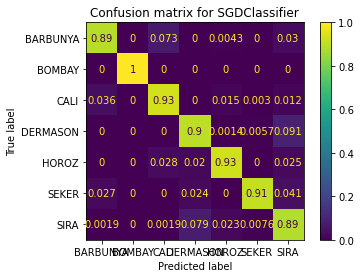

The classification results for the SGDClassifier's confusion matrix are as below
               precision    recall  f1-score   support

    BARBUNYA       0.90      0.89      0.89       233
      BOMBAY       1.00      1.00      1.00       118
        CALI       0.91      0.93      0.92       330
    DERMASON       0.91      0.90      0.91       706
       HOROZ       0.95      0.93      0.94       396
       SEKER       0.98      0.91      0.94       411
        SIRA       0.82      0.89      0.85       529

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [12]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier

#implementing linear_SGDClassifier
clfr = SGDClassifier(random_state = 10, max_iter = 1000, tol = 1e-3)
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10]
tuned_parameters = [{'alpha': Cs}]
sgd_grid = GridSearchCV(clfr, tuned_parameters, scoring = 'accuracy', cv=5)

sgd_grid.fit(x_train, y_train)   #fitting the model for gridsearch
score2 = sgd_grid.score(x_train, y_train)
print("The score is ", score2)
print("The best parameters are %s with a score of %0.2f" %(sgd_grid.best_params_, sgd_grid.best_score_))   #displaying the best parameters after tuning

sgd_grid_predictions = sgd_grid.predict(x_test)   #predictions on the the test set
 
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, sgd_grid_predictions)    #confusion matrix for classification results
accuracy_score(y_test, sgd_grid_predictions)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(sgd_grid, x_test, y_test, normalize='true')    #plotting the confusion matrix
plt.title("Confusion matrix for SGDClassifier")
plt.show()

from sklearn.metrics import classification_report
print("The classification results for the SGDClassifier's confusion matrix are as below\n", classification_report(y_test, sgd_grid_predictions))   #printing classification report


From the above classification results, we can see that the SGD Classifier has an accuracy of 91%. The overall precision is above 82% with the class BOMBAY having a 100% precision rate and the class SIRA having a 82% (least) precision rate.  
We can also see that more than 89% of the classes can be found over the whole number of elements of these classes (recall rate) with the class SIRA being the least and the class BOMBAY being the highest. 

#### PART 5: Comparision of the results

From both the SV and SGD Classifier's confusion matrices, we can see that the general accuracy of the models is similar and high. We can infer that SVClassifier has been tuned appropriately amd has been able to do a good prediction on the test dataset interms of the precision and accuracy rates. The performance of these classifiers is dependent on the selection of the best or optimal hyperparameter values.   
Each of the classifier has its own advantages and disadvantages. The SVClassifier is effective in high dimensional spaces and is memory efficient. The disadvantage is this doesnot directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.  
Eventhough the SGDClassifier requires a number of hyperparameters and is sensitive to feature scaling, it is efficient and easy to implement. 